# EDA CoinMarketCap API
_John_

## Table of content
- [General code](#general-code)
- [Quotes latest endpoint](#quotes-latest-v2-endpoint)
    - [Latest price Bitcoin (SEK)](#getting-latest-price-for-bitcoin-in-sek)
    - [Plot latest price for Bitcoin, Ethereum and Tether](#plot-latest-price-fro-bitcoin-etherium-and-tether)
    - [Shoq Bitcoin price in different currencies (on Basic Plan)](#show-bitcoin-in-different-currencies-on-basic-plan)
- [Listing Latest endpint](#listings-latest-endpoint)
    - [10 biggest coins sorted by market cap](#10-biggest-currencies-by-market-cap)
    - [10 oldest coins](#sort-by-oldest-coins)
    - [10 biggest sorted by volume last 7 dyas](#sort-by-volume-last-7-days)

## General code

In [2]:
import requests
#using only Requests class here due to one time gets (not Session)
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv('API_KEY')

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': API_KEY
}

base_url = 'https://pro-api.coinmarketcap.com'

## Quotes Latest endpoint
endpoint: _/v2/cryptocurrency/quotes/latest_

Returns the latest market quote for 1 or more cryptocurrencies. Converting to SEK.

### getting latest price for bitcoin in SEK

In [3]:
paramteres = {
    'symbol' : 'BTC',
    'convert' : 'SEK'
}
quote_endpoint = '/v2/cryptocurrency/quotes/latest'
quotes_url = f"{base_url}{quote_endpoint}"

response = requests.get(quotes_url, params=paramteres, headers=headers)
if response.status_code == 200:
    coin_data = response.json()["data"]
else:
    print(f"Error: {response.status_code}")
    print(response.text)
coin_data

{'BTC': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 11946,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': [{'slug': 'mineable', 'name': 'Mineable', 'category': 'OTHERS'},
    {'slug': 'pow', 'name': 'PoW', 'category': 'ALGORITHM'},
    {'slug': 'sha-256', 'name': 'SHA-256', 'category': 'ALGORITHM'},
    {'slug': 'store-of-value',
     'name': 'Store Of Value',
     'category': 'CATEGORY'},
    {'slug': 'state-channel', 'name': 'State Channel', 'category': 'CATEGORY'},
    {'slug': 'coinbase-ventures-portfolio',
     'name': 'Coinbase Ventures Portfolio',
     'category': 'CATEGORY'},
    {'slug': 'three-arrows-capital-portfolio',
     'name': 'Three Arrows Capital Portfolio',
     'category': 'CATEGORY'},
    {'slug': 'polychain-capital-portfolio',
     'name': 'Polychain Capital Portfolio',
     'category': 'CATEGORY'},
    {'slug': 'binance-labs-portfolio',
     'name': 'Binance Labs Portfolio',
     'category': 'CATEGORY

In [6]:
coin_name = coin_data["BTC"][0]["name"]
coin_currency = list(coin_data["BTC"][0]["quote"].keys())[0]
coin_price = coin_data["BTC"][0]["quote"]["SEK"]["price"]
f"The price for {coin_name} in is now at {coin_price:.2f} {coin_currency}"

'The price for Bitcoin in is now at 1045705.34 SEK'

### Plot latest price fro Bitcoin, Etherium and Tether

In [7]:
paramteres = {
    "slug" : "bitcoin,ethereum,tether",
    'convert' : 'SEK'
}
response = requests.get(quotes_url, params=paramteres, headers=headers)
if response.status_code == 200:
    coin_data = response.json()["data"]
else:
    print(f"Error: {response.status_code}")
    print(response.text)
coin_data

{'1': {'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 11937,
  'date_added': '2010-07-13T00:00:00.000Z',
  'tags': [{'slug': 'mineable', 'name': 'Mineable', 'category': 'OTHERS'},
   {'slug': 'pow', 'name': 'PoW', 'category': 'ALGORITHM'},
   {'slug': 'sha-256', 'name': 'SHA-256', 'category': 'ALGORITHM'},
   {'slug': 'store-of-value',
    'name': 'Store Of Value',
    'category': 'CATEGORY'},
   {'slug': 'state-channel', 'name': 'State Channel', 'category': 'CATEGORY'},
   {'slug': 'coinbase-ventures-portfolio',
    'name': 'Coinbase Ventures Portfolio',
    'category': 'CATEGORY'},
   {'slug': 'three-arrows-capital-portfolio',
    'name': 'Three Arrows Capital Portfolio',
    'category': 'CATEGORY'},
   {'slug': 'polychain-capital-portfolio',
    'name': 'Polychain Capital Portfolio',
    'category': 'CATEGORY'},
   {'slug': 'binance-labs-portfolio',
    'name': 'Binance Labs Portfolio',
    'category': 'CATEGORY'},
   {'slug': 'blockchain

In [8]:
coin_list = []
for value in coin_data.values():
    coin_dict = dict(name = value["name"], symbol = value["symbol"], price = value["quote"]["SEK"]["price"])
    coin_list.append(coin_dict)
coin_list

[{'name': 'Bitcoin', 'symbol': 'BTC', 'price': 1045705.3420030274},
 {'name': 'Tether USDt', 'symbol': 'USDT', 'price': 10.875591158290726},
 {'name': 'Ethereum', 'symbol': 'ETH', 'price': 28662.179114012684}]

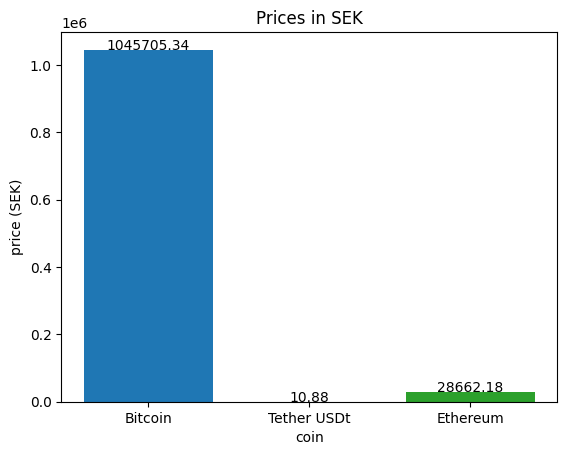

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for coin in coin_list:
    ax.bar(x = coin["name"], height = coin["price"])
    ax.text(coin["name"], coin["price"], f"{coin["price"]:.2f}", ha='center')
    ax.set(title="Prices in SEK", xlabel="coin", ylabel="price (SEK)")

### Show Bitcoin in different currencies (on basic plan)

In [ ]:
currencies = ['SEK','DKK','NOK','EUR']
response_list = []
for currency in currencies:
    paramteres = {
        'slug' : 'bitcoin',
        'convert' : currency
    }
    response = requests.get(quotes_url, params=paramteres, headers=headers)
    if response.status_code == 200:
        coin_data = response.json()["data"]
        response_list.append(coin_data)
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
response_list

[{'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 11937,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': [{'slug': 'mineable', 'name': 'Mineable', 'category': 'OTHERS'},
    {'slug': 'pow', 'name': 'PoW', 'category': 'ALGORITHM'},
    {'slug': 'sha-256', 'name': 'SHA-256', 'category': 'ALGORITHM'},
    {'slug': 'store-of-value',
     'name': 'Store Of Value',
     'category': 'CATEGORY'},
    {'slug': 'state-channel', 'name': 'State Channel', 'category': 'CATEGORY'},
    {'slug': 'coinbase-ventures-portfolio',
     'name': 'Coinbase Ventures Portfolio',
     'category': 'CATEGORY'},
    {'slug': 'three-arrows-capital-portfolio',
     'name': 'Three Arrows Capital Portfolio',
     'category': 'CATEGORY'},
    {'slug': 'polychain-capital-portfolio',
     'name': 'Polychain Capital Portfolio',
     'category': 'CATEGORY'},
    {'slug': 'binance-labs-portfolio',
     'name': 'Binance Labs Portfolio',
     'category': 'CATEGORY'}

In [48]:
for currencies in response_list:
    currency = list(currencies["1"]["quote"].keys())[0]
    price = currencies["1"]["quote"][currency]["price"]
    print(f"Current Bitcoin price in in {currency} is {price:,.2f}")

Current Bitcoin price in in SEK is 1,043,395.50
Current Bitcoin price in in DKK is 689,346.75
Current Bitcoin price in in NOK is 1,077,625.11
Current Bitcoin price in in EUR is 92,423.85


## Listings Latest endpoint

endpoint: _/v1/cryptocurrency/listings/latest_

Returns a paginated list of all active cryptocurrencies with latest market data.

### 10 biggest currencies by market cap

In [227]:
listing_endpoint = "/v1/cryptocurrency/listings/latest"
listing_url = f"{base_url}{listing_endpoint}"

listing_parameters = {
    'limit' : 10,
    'convert' : 'SEK'
}

response = requests.get(listing_url, params=listing_parameters, headers=headers)
listing_data = response.json()["data"]
listing_data

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 11937,
  'date_added': '2010-07-13T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio',
   'bitcoin-ecosystem',
   'ftx-bankruptcy-estate',
   '2017-20

In [228]:
import pandas as pd
listing_list = []
for coin in listing_data:
    listing_list.append(
        {
            "Name": coin["name"],
            "Symbol": coin["symbol"],
            "Price" : f"{coin["quote"]["SEK"]["price"]:,.2f}",
            "Market_cap" : f"{coin["quote"]["SEK"]["market_cap"]:,.2f}",
            "Market_cap_dominance" : f"{coin["quote"]["SEK"]["market_cap_dominance"]:.2f}%"
        }
    )

df = pd.DataFrame(listing_list)
df

,Name,Symbol,Price,Market_cap,Market_cap_dominance
0,Bitcoin,BTC,"1,046,441.61","20,743,798,231,686.26",60.25%
1,Ethereum,ETH,"28,646.87","3,453,181,486,716.91",10.03%
2,Tether USDt,USDT,10.87,"1,543,364,526,019.85",4.48%
3,XRP,XRP,26.51,"1,531,392,486,285.62",4.45%
4,Solana,SOL,"2,149.00","1,049,106,053,582.35",3.04%
5,BNB,BNB,"7,028.28","1,001,384,565,658.79",2.91%
6,USDC,USDC,10.87,"609,620,505,967.06",1.77%
7,Dogecoin,DOGE,2.82,"416,743,468,336.67",1.21%
8,Cardano,ADA,8.66,"304,885,652,560.70",0.88%
9,TRON,TRX,2.65,"227,953,302,012.79",0.66%


### Sort by oldest coins

In [218]:
listing_age_parameters = {
    'limit' : 10,
    'convert' : 'SEK',
    'sort' : "date_added",
    'sort_dir' : "asc"
}

response = requests.get(listing_url, params=listing_age_parameters, headers=headers)
listing_data_age = response.json()["data"]
listing_list_age = []
for coin in listing_data_age:
    listing_list_age.append(
        {
            "Name": coin["name"],
            "Symbol": coin["symbol"],
            "Price" : f"{coin["quote"]["SEK"]["price"]:,.2f}",
            "Date_added" : coin["date_added"]
        }
    )

age_df = pd.DataFrame(listing_list_age)
age_df

,Name,Symbol,Price,Date_added
0,Bitcoin,BTC,"1,046,027.15",2010-07-13T00:00:00.000Z
1,Litecoin,LTC,"1,272.18",2013-04-28T00:00:00.000Z
2,Namecoin,NMC,11.11,2013-04-28T00:00:00.000Z
3,Peercoin,PPC,4.58,2013-04-28T00:00:00.000Z
4,Terracoin,TRC,0.17,2013-04-28T00:00:00.000Z
5,Novacoin,NVC,0.31,2013-04-28T00:00:00.000Z
6,Feathercoin,FTC,0.06,2013-05-03T00:00:00.000Z
7,Freicoin,FRC,0.15,2013-05-03T00:00:00.000Z
8,Ixcoin,IXC,0.99,2013-05-08T00:00:00.000Z
9,WorldCoin WDC,WDC,0.03,2013-05-22T00:00:00.000Z


### Sort by volume last 7 days

In [226]:
listing_volume_parameters = {
    'limit' : 10,
    'convert' : 'SEK',
    'sort' : "volume_7d",
}

response = requests.get(listing_url, params=listing_volume_parameters, headers=headers)
listing_data__volume = response.json()["data"]
listing_list_volume = []
for coin in listing_data__volume:
    listing_list_volume.append(
        {
            "Name": coin["name"],
            "Symbol": coin["symbol"],
            "Price" : f"{coin["quote"]["SEK"]["price"]:,.2f}",
            "Volume_7d" : f"{coin["quote"]["SEK"]["volume_24h"]:,.2f}",
        }
    )

volume_df = pd.DataFrame(listing_list_volume)
volume_df

,Name,Symbol,Price,Volume_7d
0,Tether USDt,USDT,10.87,"858,489,646,302.71"
1,Bitcoin,BTC,"1,046,431.22","398,029,940,007.86"
2,Ethereum,ETH,"28,630.13","213,344,059,548.09"
3,USDC,USDC,10.87,"77,127,784,558.09"
4,First Digital USD,FDUSD,10.86,"59,632,192,177.94"
5,XRP,XRP,26.48,"47,700,099,052.55"
6,Solana,SOL,"2,148.07","31,895,431,408.79"
7,Solayer,LAYER,12.26,"25,327,291,943.76"
8,Wrapped Solana,SOL,"2,145.42","18,322,447,012.25"
9,BNB,BNB,"7,029.03","22,202,484,987.32"
